In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import cm
import matplotlib.ticker as ticker

%matplotlib notebook
plt.rcParams["font.family"] = "Arial"
#plt.style.use('classic')

In [2]:
df = pd.read_csv('4Cl(3)-2_15_2_FISTA.LDLTS', sep = '\t')

In [3]:
T = np.asarray(df[df.columns[0]])
E = 1/np.asarray(df.columns).astype(float)[1:]
print('len E:', len(E), '; len T:',len(T))

E, T = np.meshgrid(E, T)

len E: 500 ; len T: 227


In [4]:
df = df.drop(columns = df.columns[0])
data = np.asarray(df)
data.shape

(227, 500)

<IPython.core.display.Javascript object>


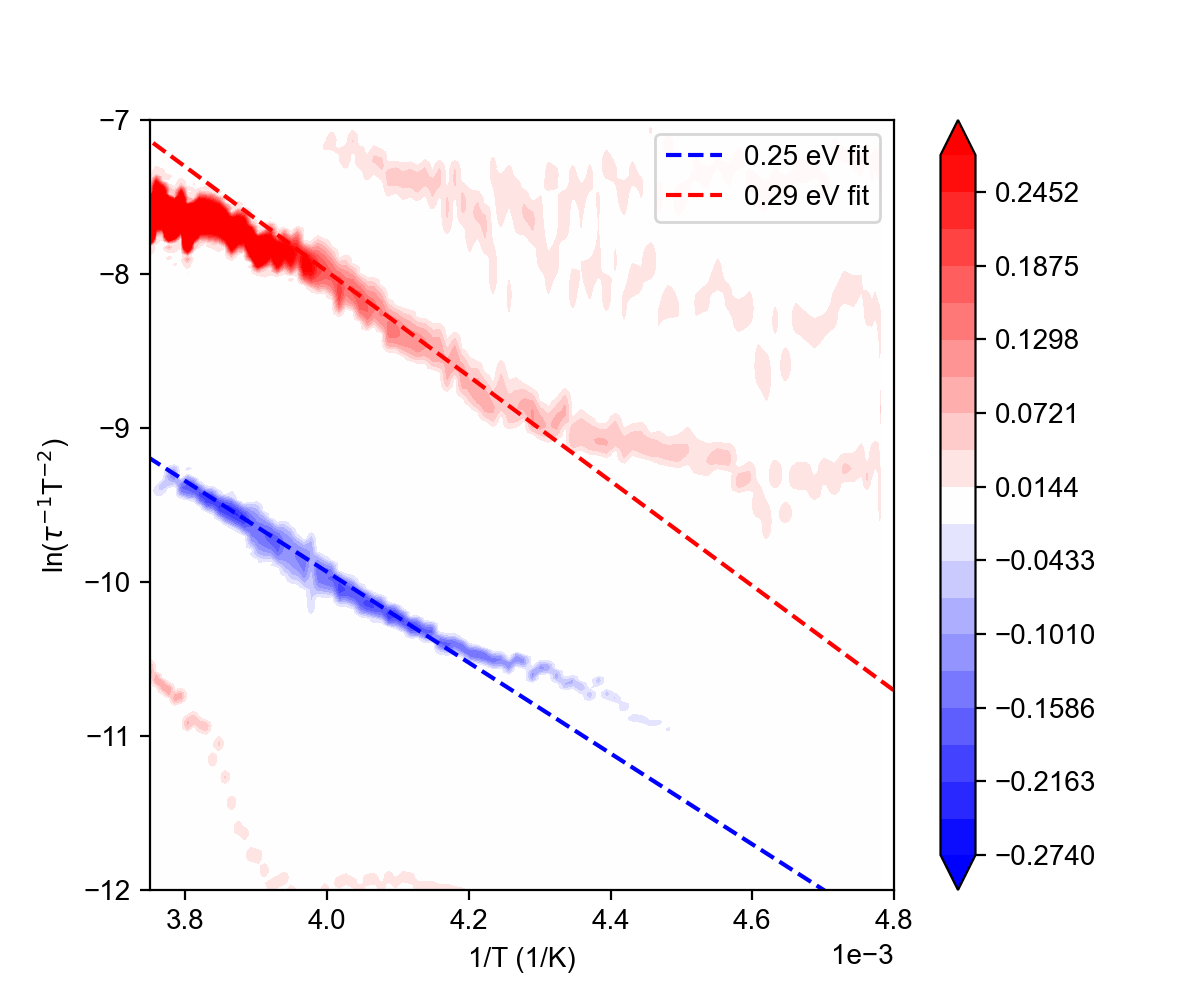

Text(0.5, 0, '1/T (1/K)')

In [5]:
fig = plt.figure(figsize = (6,5))
ax = fig.add_subplot(111)

ax.ticklabel_format(style='sci', axis='x', scilimits=(0,0), useOffset = False)

v = np.abs(np.average(data))*60
vmin, vmax = -v, v
cmap = cm.bwr
levels = np.linspace(vmin, vmax, 20)





heatmap = ax.contourf(1/T, np.log(E*T**-2), data, levels = levels, cmap=cmap,
                             vmin = vmin, vmax = vmax, extend = 'both')
#ax.set_xscale('log')
plt.colorbar(heatmap)

tick_spacing = 0.2e-3
ax.xaxis.set_major_locator(ticker.MultipleLocator(tick_spacing))

ax.set_ylim(-12, -7)
ax.set_xlim(3.75e-3, 4.8e-3)

ax.set_ylabel(r'ln($\tau^{-1}$T$^{-2}$)')
ax.set_xlabel(r'1/T (1/K)')

In [6]:
blue_gamma = 6.4e-0
blue_ea = 0.254
kB = 8.617e-5

blue = lambda x: blue_gamma*x**2*np.exp(-blue_ea/kB/x)

red_gamma = 2.75e2
red_ea = 0.293
red  = lambda x: red_gamma*x**2*np.exp(-red_ea/kB/x)

Tx = np.linspace(200, 350, 5)

ax.plot(1/Tx, np.log(blue(Tx)*Tx**-2), '--b', label = '0.25 eV fit')
ax.plot(1/Tx, np.log(red(Tx)*Tx**-2),  '--r', label = '0.29 eV fit')
ax.legend()
plt.savefig('4Cl(3)-2_Arrhenius_Heatplot.svg')